In [11]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from wordcloud import WordCloud

# Preprocessing and evaluation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l1, l2

In [12]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [211]:
df = pd.read_csv('/content/sample_data/mussorie_reviews.csv')
df.head()

,Review,Date of stay,Rating
0,Most beautiful stay at Mussoorie...such a gorg...,Date of stay: August 2021,"<span class=""ui_bubble_rating bubble_50""></span>"
1,NaN,NaN,NaN
2,The Savoy is one of those rare hotels that not...,Date of stay: October 2020,"<span class=""ui_bubble_rating bubble_50""></span>"
3,NaN,NaN,NaN
4,Def Best stay in Uttarakand ! Amazing nature. ...,Date of stay: November 2021,"<span class=""ui_bubble_rating bubble_50""></span>"


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30391 entries, 0 to 30390
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        15196 non-null  object
 1   Date of stay  15180 non-null  object
 2   Rating        15196 non-null  object
dtypes: object(3)
memory usage: 712.4+ KB


In [213]:
df['Rating'] = df['Rating'].str.replace('\D+', ' ')
df['Rating']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30391 entries, 0 to 30390
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        15196 non-null  object
 1   Date of stay  15180 non-null  object
 2   Rating        15196 non-null  object
dtypes: object(3)
memory usage: 712.4+ KB


<ipython-input-213-c683cf73c633>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Rating'] = df['Rating'].str.replace('\D+', ' ')


In [230]:
# nltk is one of the most useful libraries when it comes to nlp
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [214]:
#df.dropna(how = 'any').shape
df.dropna(subset = ['Rating'], how = 'any', inplace = True)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15196 entries, 0 to 30390
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        15196 non-null  object
 1   Date of stay  15180 non-null  object
 2   Rating        15196 non-null  object
dtypes: object(3)
memory usage: 474.9+ KB


In [215]:
df['Rating'] = pd.to_numeric(df['Rating'], downcast='float')

In [195]:
df['Rating']

0         50 
2         50 
4         50 
6         50 
8         50 
         ... 
30382     40 
30384     50 
30386     40 
30388     40 
30390     40 
Name: Rating, Length: 15196, dtype: object

In [216]:
df['Rating'].mean()

46.49579

In [217]:
df['Date of stay']

0          Date of stay: August 2021
2         Date of stay: October 2020
4        Date of stay: November 2021
6        Date of stay: November 2021
8         Date of stay: October 2021
                    ...             
30382         Date of stay: May 2008
30384       Date of stay: April 2007
30386         Date of stay: May 2009
30388       Date of stay: April 2009
30390        Date of stay: June 2008
Name: Date of stay, Length: 15196, dtype: object

In [218]:
df['Date of stay'] = df['Date of stay'].str.strip('Date of stay:')
df['Date of stay']

0          August 2021
2         October 2020
4        November 2021
6        November 2021
8         October 2021
             ...      
30382         May 2008
30384       April 2007
30386         May 2009
30388       April 2009
30390        June 2008
Name: Date of stay, Length: 15196, dtype: object

In [168]:
#library 
#import datetime as dt
#df['Date of stay'] = pd.to_datetime(df['Date of stay'])

Text(0.5, 1.0, 'Rating Distribution Across Dataset')

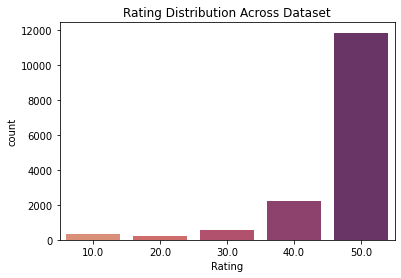

In [219]:
sns.countplot(data=df, x='Rating', palette='flare').set_title('Rating Distribution Across Dataset')

In [220]:
# Length of word in sentence
df['Length'] = df['Review'].apply(len)
df.head()


,Review,Date of stay,Rating,Length
0,Most beautiful stay at Mussoorie...such a gorg...,August 2021,50.0,743
2,The Savoy is one of those rare hotels that not...,October 2020,50.0,1115
4,Def Best stay in Uttarakand ! Amazing nature. ...,November 2021,50.0,261
6,Very very friendly and efficient staff … loved...,November 2021,50.0,263
8,Exceptional property. Just great experience. V...,October 2021,50.0,229


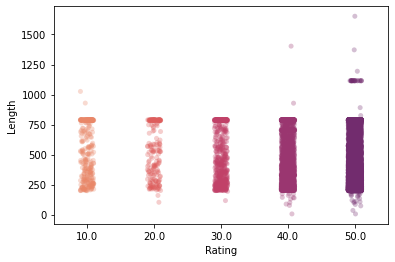

In [221]:
sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)

TEXT PREPROCESSING

In [222]:
# Let's change the rating to be more general and easier to understand
def rating(score):
    if float(score) > 30:
        return 'GOOD'
    elif float(score) == 30:
        return 'Neutral'
    else:
        return 'Bad'

In [223]:
df['Rating'] = df['Rating'].apply(rating)
df['Rating']

0        GOOD
2        GOOD
4        GOOD
6        GOOD
8        GOOD
         ... 
30382    GOOD
30384    GOOD
30386    GOOD
30388    GOOD
30390    GOOD
Name: Rating, Length: 15196, dtype: object

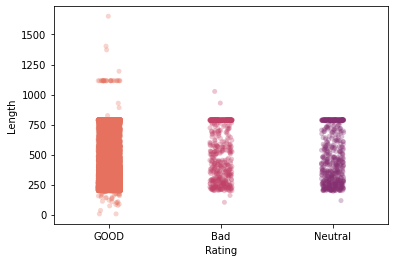

In [224]:
sns.stripplot(data=df, x='Rating', y='Length', palette='flare', alpha=0.3)

Text(0.5, 1.0, 'Rating Distribution Across Dataset')

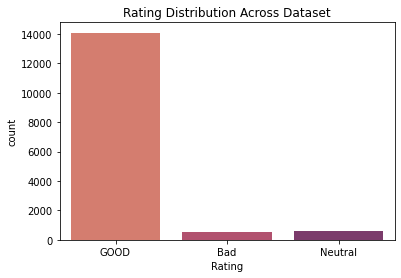

In [225]:
sns.countplot(data=df, x='Rating', palette='flare').set_title('Rating Distribution Across Dataset')

In [227]:
length = df['Length'].sum()
length

5848184

In [237]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [238]:
print('Original:')
print(df['Review'][0])
print()

sentence = []
for word in df['Review'][0].split():
    stemmer = SnowballStemmer('english')
    sentence.append(stemmer.stem(word))
print('Stemming:')
print(' '.join(sentence))
print()

sentence = []
for word in df['Review'][0].split():
    lemmatizer = WordNetLemmatizer()
    sentence.append(lemmatizer.lemmatize(word, 'v'))
print('Lemmatization:')
print(' '.join(sentence))

Original:
Most beautiful stay at Mussoorie...such a gorgeous property. I really left my heart back there.  One of the most memorable experience is when we were given a beautiful birthday celebration in the green house.  The food,  the staff, the rooms were  just excellent  Chef Prakash Negi is just fabulous he went out of his way to ensure the kids enjoyed good food as well.   Mussoorie is beautiful as it is but this hotel made the trip so special for us.  The location is just fabulous Right at the heart of Mussoorie on the mall road, we could walk down to do our shopping whenever we felt like. And at the same time the property feels secluded and the rooms are so quiet the clouds had descended  into our balcony.   Truly fabulous just check in.

Stemming:
most beauti stay at mussoorie...such a gorgeous property. i realli left my heart back there. one of the most memor experi is when we were given a beauti birthday celebr in the green house. the food, the staff, the room were just excel 

In [239]:
def cleaning(text):
    #remove punctuations and uppercase
    clean_text = text.translate(str.maketrans('','',string.punctuation)).lower()
    
    #remove stopwords
    clean_text = [word for word in clean_text.split() if word not in stopwords.words('english')]
    
    #lemmatize the word
    sentence = []
    for word in clean_text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word, 'v'))

    return ' '.join(sentence)

In [240]:
df['Review'] = df['Review'].apply(cleaning)

In [241]:
df['Review']

0        beautiful stay mussooriesuch gorgeous property...
2        savoy one rare hotels justify hype surround fa...
4        def best stay uttarakand amaze nature view him...
6        friendly efficient staff … love hospitality…sp...
8        exceptional property great experience deliciou...
                               ...                        
30382    stay hotel 5 family members book 2 room room o...
30384                         best histrocally place india
30386    wonderful experience mussoorie great value mon...
30388    sterling resort first look doesnt seem one fin...
30390    stay hotel sterling resort good experience vie...
Name: Review, Length: 15196, dtype: object

In [242]:
df.to_csv('cleaned_df.csv', index=False)

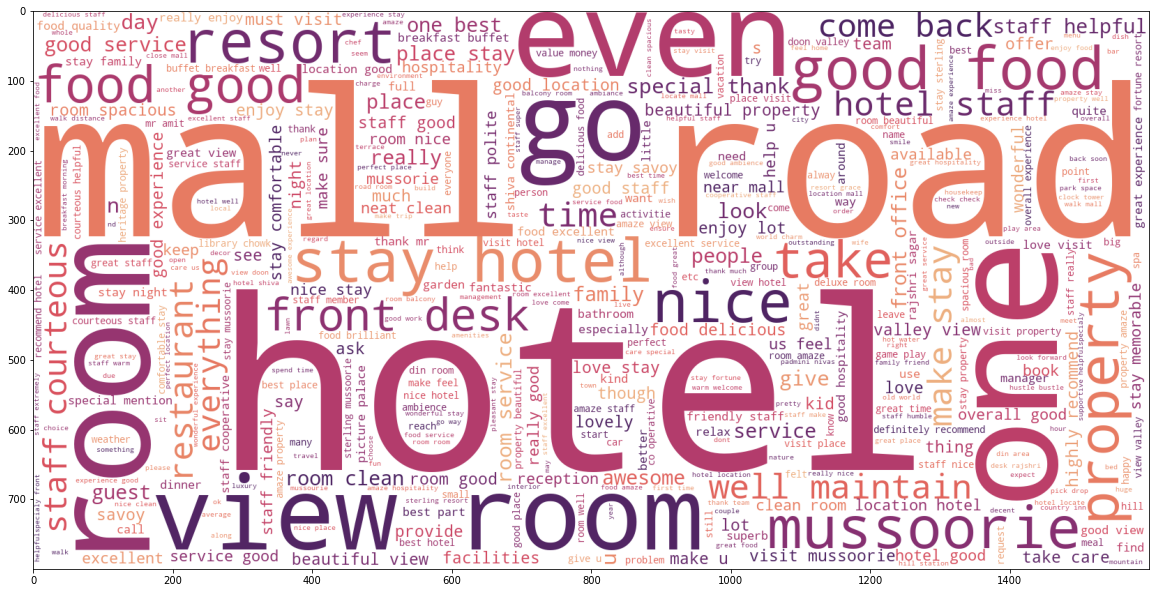

In [243]:
# After cleaning, let's see the most common used word
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=1600,background_color="white", colormap='flare').generate(' '.join(df['Review']))

plt.imshow(wc)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Rating'], test_size=0.2)

BUILDING MODEL WITH SKLEARN

In [245]:
tfid = TfidfVectorizer()
train_tfid_matrix = tfid.fit_transform(X_train)
test_tfid_matrix = tfid.transform(X_test)

In [246]:
pickle.dump(tfid, open('tfidf.pkl', 'wb'))

In [247]:
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC(),
          LogisticRegression(max_iter=1000),
          KNeighborsClassifier(),
          BernoulliNB()]

In [248]:
accuracy = []

for model in models:
    cross_val = cross_val_score(model, train_tfid_matrix, y_train, scoring='accuracy',
                               cv=StratifiedKFold(10)).mean()
    accuracy.append(cross_val)

In [249]:
models_name = ['DecisionTreeClassifier', 'RandomForestClassifier', 'SVC',
         'LogisticRegression', 'KNeighborsClassifier', 'BernoulliNB']

acc = pd.DataFrame({'Model': models_name, 'Accuracy': accuracy})
acc

,Model,Accuracy
0,DecisionTreeClassifier,0.925798
1,RandomForestClassifier,0.934189
2,SVC,0.944554
3,LogisticRegression,0.946446
4,KNeighborsClassifier,0.938384
5,BernoulliNB,0.932297


In [250]:
log = LogisticRegression(max_iter=1000)
log.fit(train_tfid_matrix, y_train)

pred = log.predict(test_tfid_matrix)

In [251]:
pickle.dump(log, open('ml_model.pkl', 'wb'))

In [252]:
ml = pickle.load(open('ml_model.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))
def ml_predict(text):
    clean_text = cleaning(text)
    tfid_matrix = tfidf.transform([clean_text])
    pred_proba = ml.predict_proba(tfid_matrix)
    idx = np.argmax(pred_proba)
    pred = ml.classes_[idx]
    
    return pred, pred_proba[0][idx]

ml_predict('poor room service')

('Bad', 0.7491252157292735)

In [258]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  47   59    9]
 [   1 2823    3]
 [   9   71   18]]
              precision    recall  f1-score   support

         Bad       0.82      0.41      0.55       115
        GOOD       0.96      1.00      0.98      2827
     Neutral       0.60      0.18      0.28        98

    accuracy                           0.95      3040
   macro avg       0.79      0.53      0.60      3040
weighted avg       0.94      0.95      0.94      3040

